In [1]:
# Data and Visualize
from IPython.display import clear_output
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocesing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

# Modelling
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import optuna

In [2]:
data = pd.read_csv("../input/heart-failure-prediction/heart.csv")

## Attribute Information
---
* **Age**: age of the patient [years]
* **Sex**: sex of the patient 
    * M: Male, 
    * F: Female
* **ChestPainType**: chest pain type 
    * TA: Typical Angina,
    * ATA: Atypical Angina,
    * NAP: Non-Anginal Pain, 
    * ASY: Asymptomatic
* **RestingBP**: resting blood pressure [mm Hg]
* **Cholesterol**: serum cholesterol [mm/dl]
* **FastingBS**: fasting blood sugar 
    * 1: if FastingBS > 120 mg/dl, 
    * 0: otherwise
* **RestingECG**: resting electrocardiogram results 
    * Normal: Normal, 
    * ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 
    * LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria
* **MaxHR**: maximum heart rate achieved [Numeric value between 60 and 202]
* **ExerciseAngina**: exercise-induced angina 
    * Y: Yes,
    * N: No
* **Oldpeak**: oldpeak = ST [Numeric value measured in depression]
* **ST_Slope**: the slope of the peak exercise ST segment 
    * Up: upsloping, 
    * Flat: flat, 
    * Down: downsloping
* **HeartDisease**: output class 
    * 1: heart disease,
    * 0: Normal

In [3]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Attributes

## Age
*Age of the patient [years]*

In [5]:
data[["Age"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.0,54.0,60.0,77.0


In [6]:
fig = px.histogram(data["Age"], x="Age", width=600, height=400)
fig.show()

## Sex
*Sex of the patient*
* M: Male
* F: Female

In [7]:
data["Sex"].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [8]:
fig = px.pie(data["Sex"], names="Sex", width=600, height=400)
fig.show()

## Chest Pain Type
*Chest pain type*
* TA: Typical Angina
* ATA: Atypical Angina
* NAP: Non-Anginal Pain
* ASY: Asymptomatic

In [9]:
fig = px.histogram(data["ChestPainType"], x="ChestPainType", width=600, height=400)
fig.show()

## Resting Blood Pressure
*Resting blood pressure [mm Hg]*

In [10]:
data[["RestingBP"]].describe().T

,count,mean,std,min,25%,50%,75%,max
RestingBP,918.0,132.396514,18.514154,0.0,120.0,130.0,140.0,200.0


In [11]:
fig = px.histogram(data["RestingBP"], x="RestingBP", width=600, height=400)
fig.show()

# Looks like there are incorrectly entered value 

## Cholesterol
*Serum cholesterol [mm/dl]*

In [12]:
data[["Cholesterol"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0


In [13]:
fig = px.histogram(data["Cholesterol"], x="Cholesterol", width=600, height=400)
fig.show()

# Looks like there are incorrectly entered value 

## Fasting Blood Sugar
*Fasting blood sugar*
* 1: if FastingBS > 120 mg/dl,
* 0: otherwise

In [14]:
data[["FastingBS"]].value_counts()

FastingBS
0            704
1            214
dtype: int64

In [15]:
fig = px.pie(data["FastingBS"], names="FastingBS", width=600, height=400)
fig.show()

## RestingECG: 
*Resting electrocardiogram results*
* Normal: Normal
* ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria

In [16]:
data[["RestingECG"]].value_counts()

RestingECG
Normal        552
LVH           188
ST            178
dtype: int64

In [17]:
fig = px.histogram(data["RestingECG"], x="RestingECG", width=600, height=400)
fig.show()

## MaxHR
*Maximum heart rate achieved [Numeric value between 60 and 202]*

In [18]:
data[["MaxHR"]].describe().T

,count,mean,std,min,25%,50%,75%,max
MaxHR,918.0,136.809368,25.460334,60.0,120.0,138.0,156.0,202.0


In [19]:
fig = px.histogram(data["MaxHR"], x="MaxHR", width=600, height=400)
fig.show()

## ExerciseAngina
*Exercise-induced angina*
* Y: Yes
* N: No

In [20]:
data["ExerciseAngina"].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [21]:
fig = px.pie(data["ExerciseAngina"], names="ExerciseAngina", width=600, height=400)
fig.show()

## Oldpeak
*oldpeak = ST [Numeric value measured in depression]*

In [22]:
data[["Oldpeak"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Oldpeak,918.0,0.887364,1.06657,-2.6,0.0,0.6,1.5,6.2


In [23]:
fig = px.histogram(data["Oldpeak"], x="Oldpeak", width=600, height=400)
fig.show()

## ST_Slope
*The slope of the peak exercise ST segment*
* Up: upsloping
* Flat: flat
* Down: downsloping

In [24]:
data["ST_Slope"].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [25]:
fig = px.pie(data["ST_Slope"], names="ST_Slope", width=600, height=400)
fig.show()

## HeartDisease
*Output class*
* 1: heart disease,
* 0: Normal

In [26]:
data["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [27]:
fig = px.pie(data["HeartDisease"], names="HeartDisease", width=600, height=400)
fig.show()

<AxesSubplot:>

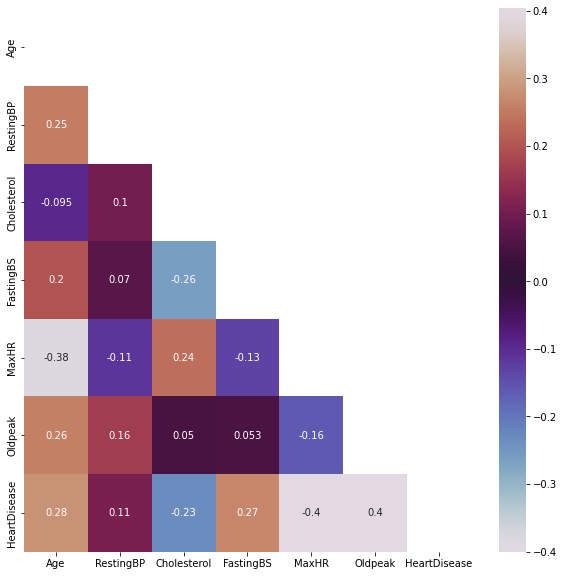

In [28]:
plt.figure(figsize=(10,10))
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, mask=matrix, cmap="twilight")

# Preprocessing

## Outlier Suppression

In [29]:
data.loc[data["RestingBP"] < 100, "RestingBP"] = 100
data.loc[data["RestingBP"] > 170, "RestingBP"] = 170

data.loc[data["Cholesterol"] < 100, "Cholesterol"] = 100
data.loc[data["Cholesterol"] > 320, "Cholesterol"] = 320

data.loc[data["MaxHR"] < 60, "MaxHR"] = 60
data.loc[data["MaxHR"] > 202, "MaxHR"] = 202

data.loc[data["Oldpeak"] < 0, "Oldpeak"] = 0
data.loc[data["Oldpeak"] > 2.5, "Oldpeak"] = 2.5

In [30]:
# Getting Dummy Variables
data = pd.get_dummies(data, columns=["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"], drop_first=True)

# Modelling

In [31]:
x = data.drop("HeartDisease", axis=1)
y = data["HeartDisease"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=44, shuffle=True)

In [32]:
algorithms = [RidgeClassifier, 
              SVC, 
              LinearSVC, 
              RandomForestClassifier,
              KNeighborsClassifier, 
              DecisionTreeClassifier,
              LGBMClassifier,
              XGBClassifier,
             ]

In [33]:
df_algorithms = pd.DataFrame(columns=["Model", "Train Accuracy", "Test Accuracy"])

In [34]:
def autoML(algorithm): 
    
    model = algorithm().fit(x_train, y_train)
    train_acc = model.score(x_train, y_train)
    model_name = algorithm.__name__
    
    y_pred = model.predict(x_test)
    test_acc = accuracy_score(y_test, y_pred)

    return model_name, train_acc, test_acc

In [35]:
for alg in algorithms:
    
    model_name, train_acc, test_acc = autoML(alg)
    
    df_algorithms = df_algorithms.append({"Model" : model_name,
                                          "Train Accuracy": train_acc,
                                          "Test Accuracy": test_acc}, ignore_index=True)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[17:48:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [36]:
df_algorithms.sort_values(by=["Test Accuracy", "Train Accuracy"],ascending=False)

,Model,Train Accuracy,Test Accuracy
6,LGBMClassifier,1.000000,0.902174
3,RandomForestClassifier,1.000000,0.869565
7,XGBClassifier,1.000000,0.869565
0,RidgeClassifier,0.872881,0.847826
2,LinearSVC,0.854722,0.804348
1,SVC,0.714286,0.804348
4,KNeighborsClassifier,0.771186,0.739130
5,DecisionTreeClassifier,1.000000,0.717391


In [37]:
model = LGBMClassifier().fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9021739130434783

In [38]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        43
           1       0.92      0.90      0.91        49

    accuracy                           0.90        92
   macro avg       0.90      0.90      0.90        92
weighted avg       0.90      0.90      0.90        92



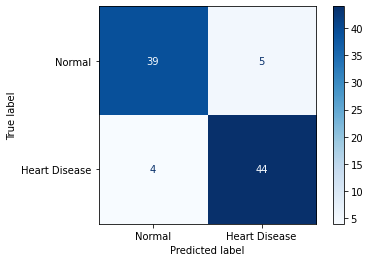

In [39]:
plot_confusion_matrix(model,
                      x_test,
                      y_test,
                      display_labels=["Normal", "Heart Disease"],
                      cmap=plt.cm.Blues,
                     )